In [42]:
from keras import models
from keras import layers
from keras.utils.np_utils import to_categorical
import numpy as np
import os
import matplotlib.pyplot as plt

In [5]:
dataset = np.loadtxt('resources/emnist-balanced-test.csv', delimiter=',')

(18800, 785)

In [46]:
train_set = dataset[:15000,1:]
train_set = train_set.astype('float32') / 255

train_labels = to_categorical(dataset[:15000, 0])
train_labels = train_labels.astype('uint8')

test_set = dataset[15000:,1:]
test_set = train_set.astype('float32') / 255

test_labels = to_categorical(dataset[15000:,0])
test_labels = test_labels.astype('uint8')

In [48]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(128, activation='relu'))
network.add(layers.Dense(47, activation='softmax'))
network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])
history = network.fit(train_set, train_labels, epochs=100, 
                      batch_size=128,
                     validation_data=(train_set, train_labels))


Train on 15000 samples, validate on 15000 samples
Epoch 1/100
15000/15000 [==============================] - 2s 161us/step - loss: 1.9004 - acc: 0.4850 - val_loss: 1.5190 - val_acc: 0.5560
Epoch 2/100
15000/15000 [==============================] - 2s 139us/step - loss: 1.1349 - acc: 0.6691 - val_loss: 1.1689 - val_acc: 0.6462
Epoch 3/100
15000/15000 [==============================] - 2s 137us/step - loss: 0.8886 - acc: 0.7350 - val_loss: 0.9361 - val_acc: 0.7090
Epoch 4/100
15000/15000 [==============================] - 2s 151us/step - loss: 0.7340 - acc: 0.7725 - val_loss: 0.6650 - val_acc: 0.7898
Epoch 5/100
15000/15000 [==============================] - 2s 148us/step - loss: 0.6225 - acc: 0.8002 - val_loss: 0.6184 - val_acc: 0.7974
Epoch 6/100
15000/15000 [==============================] - 2s 139us/step - loss: 0.5359 - acc: 0.8278 - val_loss: 0.5253 - val_acc: 0.8229
Epoch 7/100
15000/15000 [==============================] - 2s 141us/step - loss: 0.4652 - acc: 0.8467 - val_loss: 0.

15000/15000 [==============================] - 2s 127us/step - loss: 0.0264 - acc: 0.9907 - val_loss: 0.0123 - val_acc: 0.9972
Epoch 60/100
15000/15000 [==============================] - 2s 129us/step - loss: 0.0231 - acc: 0.9919 - val_loss: 0.0183 - val_acc: 0.9929
Epoch 61/100
15000/15000 [==============================] - 2s 130us/step - loss: 0.0207 - acc: 0.9920 - val_loss: 0.0252 - val_acc: 0.9901
Epoch 62/100
15000/15000 [==============================] - 2s 128us/step - loss: 0.0213 - acc: 0.9925 - val_loss: 0.0130 - val_acc: 0.9959
Epoch 63/100
15000/15000 [==============================] - 2s 131us/step - loss: 0.0212 - acc: 0.9925 - val_loss: 0.0366 - val_acc: 0.9863
Epoch 64/100
15000/15000 [==============================] - 2s 129us/step - loss: 0.0221 - acc: 0.9918 - val_loss: 0.0201 - val_acc: 0.9926
Epoch 65/100
15000/15000 [==============================] - 2s 132us/step - loss: 0.0204 - acc: 0.9920 - val_loss: 0.0259 - val_acc: 0.9901
Epoch 66/100
15000/15000 [=======

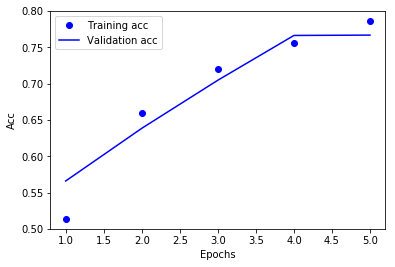

In [43]:
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [31]:
test_labels[0]

10